In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data Preprocessing


In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated

<bound method DataFrame.duplicated of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

###Text Preprocessing

In [11]:
import re
import string

In [13]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

###Covert uppercase to lowercase


In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##remove links

In [19]:
import re

data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', part, flags=re.MULTILINE) for part in x.split()))


In [20]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##remove punctuations

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply the function correctly to the 'tweet' column
data["tweet"] = data["tweet"].apply(remove_punctuation)


In [26]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this would you go? #talk #makememories...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service apple won't even talk to ...
Name: tweet, dtype: object

In [31]:
data["tweet"].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [32]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [34]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)


In [35]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [38]:
!pip install nltk

In [39]:
import nltk

In [40]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [42]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(word for word in x.split() if word not in sw))


In [45]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [47]:
from nltk.stem import PorterStemmer

# Create an instance of PorterStemmer
ps = PorterStemmer()


In [48]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [49]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [50]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


building vocabulary


In [52]:
from collections import Counter
vocab = Counter()

In [53]:
vocab.update(['java','python','c++'])

In [54]:
vocab


Counter({'java': 1, 'python': 1, 'c++': 1})

In [55]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [57]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [59]:
len(vocab)

15951

In [64]:
tokens = [key for key in vocab if vocab[key] > 10]

In [66]:
len(tokens)

1145

In [67]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file= open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

divide dataset

In [69]:
x =data['tweet']
y =data['label']

In [75]:
!pip install scikit-learn

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [79]:
x_train.shape

(6336,)

In [80]:
x_test.shape

(1584,)

In [81]:
y_test

4894    1
3285    0
2609    1
6037    1
3737    0
       ..
5322    1
543     0
4000    0
6279    0
1288    0
Name: label, Length: 1584, dtype: int64

##vectorization

In [84]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1  # Mark the presence of the word in the sentence

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new


In [85]:
vectorized_x_train=vectorizer(x_train,tokens)

In [87]:
vectorized_x_test=vectorizer(x_test,tokens)

In [88]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
y_train.value_counts()

label
0    4707
1    1629
Name: count, dtype: int64

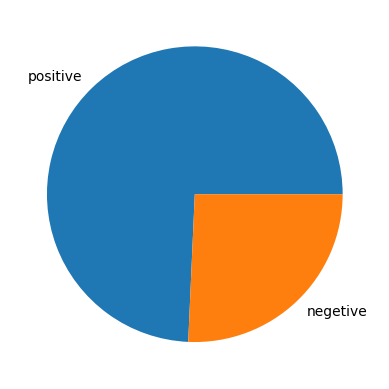

In [90]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels= ['positive','negetive'])
plt.show()

handle imbalance dataset

In [91]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 196.9 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 233.8 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 291.5 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 312.2 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 313.8 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 327.9 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 305.7 kB/s eta 0:

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote =smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9414, 1145) (9414,)


In [93]:
y_train_smote.value_counts()

label
1    4707
0    4707
Name: count, dtype: int64

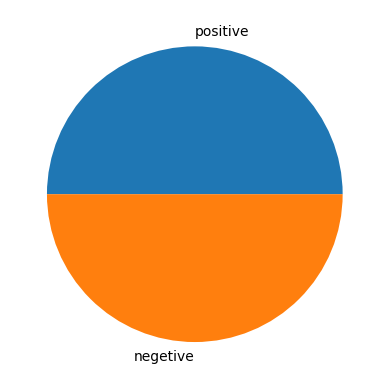

In [94]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels= ['positive','negetive'])
plt.show()

In [95]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
y_train_smote

0       1
1       0
2       1
3       0
4       0
       ..
9409    1
9410    1
9411    1
9412    1
9413    1
Name: label, Length: 9414, dtype: int64

In [97]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [98]:
y_test

4894    1
3285    0
2609    1
6037    1
3737    0
       ..
5322    1
543     0
4000    0
6279    0
1288    0
Name: label, Length: 1584, dtype: int64

##Model traning and evaluation

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [102]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


##logistic regression

In [121]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)

y_test_pred=lr.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Training Scores: 
	Accuracy = 0.936
	Precision = 0.913
	Recall = 0.965
	F1-Score = 0.938
Validation Scores: 
	Accuracy = 0.884
	Precision = 0.743
	Recall = 0.821
	F1-Score = 0.78


##nalve bay

In [122]:
mnb=MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=mnb.predict(vectorized_x_train_smote)

y_test_pred=mnb.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Training Scores: 
	Accuracy = 0.904
	Precision = 0.865
	Recall = 0.958
	F1-Score = 0.909
Validation Scores: 
	Accuracy = 0.883
	Precision = 0.708
	Recall = 0.909
	F1-Score = 0.796


##decision tree

In [123]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=dt.predict(vectorized_x_train_smote)

y_test_pred=dt.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores: 
	Accuracy = 0.84
	Precision = 0.676
	Recall = 0.698
	F1-Score = 0.686


##random forest

In [124]:
rf=RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=rf.predict(vectorized_x_train_smote)

y_test_pred=rf.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Validation Scores: 
	Accuracy = 0.886
	Precision = 0.804
	Recall = 0.723
	F1-Score = 0.761


##support vector machine

In [125]:
svm=SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=svm.predict(vectorized_x_train_smote)

y_test_pred=svm.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)


Training Scores: 
	Accuracy = 0.977
	Precision = 0.959
	Recall = 0.996
	F1-Score = 0.977
Validation Scores: 
	Accuracy = 0.886
	Precision = 0.775
	Recall = 0.771
	F1-Score = 0.773


In [131]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)
